In [ ]:
import torch
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()

        # Encoder layers
        self.enc_conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)
        self.enc_conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.enc_conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)

        # Decoder layers
        self.dec_conv1 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        self.dec_conv3 = nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Encode
        x = self.relu(self.enc_conv1(x))
        x = self.relu(self.enc_conv2(x))
        x = self.relu(self.enc_conv3(x))

        # Decode
        x = self.relu(self.dec_conv1(x))
        x = self.relu(self.dec_conv2(x))
        x = torch.sigmoid(self.dec_conv3(x))

        return x


In [ ]:
import torch
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(ConvAutoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Encoder layers
        self.enc = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            # nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            # nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, self.latent_dim),
            nn.BatchNorm1d(self.latent_dim),
            nn.LeakyReLU()
        )


        # self.enc_conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)
        # self.enc_conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        # self.enc_conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)

        # # Latent space
        # self.latent_dim = latent_dim
        # self.fc1 = nn.Linear(64 * 28 * 28, self.latent_dim)
        self.fc2 = nn.Sequential(
            nn.Linear(self.latent_dim, 64 * 28 * 28),
            nn.BatchNorm1d(64 * 28 * 28),
            nn.LeakyReLU()
        )

        self.dec = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            # nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

        # Decoder layers
        # self.dec_conv1 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        # self.dec_conv2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        # self.dec_conv3 = nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1)

        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


        # Classification layer
        self.classifier = nn.Sequential(nn.Linear(self.latent_dim, 1), nn.Sigmoid())


    # def encode(self, x):
    #     x = self.relu(self.enc_conv1(x))
    #     x = self.relu(self.enc_conv2(x))
    #     x = self.relu(self.enc_conv3(x))
    #     x = x.view(x.size(0), -1)
    #     x = self.relu(self.fc1(x))
    #     return x

    # def decode(self, z):
    #     z = self.relu(self.fc2(z))
    #     z = z.view(z.size(0), 64, 28, 28)
    #     z = self.relu(self.dec_conv1(z))
    #     z = self.relu(self.dec_conv2(z))
    #     z = self.sigmoid(self.dec_conv3(z))
    #     return z

    def forward(self, x):
        # Encode
        z = self.enc(x)

        # Classification
        y = self.classifier(z)

        # Decode
        flat = self.fc2(z)
        x_hat = flat.reshape(flat.shape[0], -1, 28, 28)
        x_hat = self.dec(x_hat)

        return x_hat, y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.2 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pandas as pd
import pydicom
import os
import numpy as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import cv2
import tqdm
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import imageio
import os

import torchvision as v
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from tqdm import tqdm
import random
from collections import defaultdict



# dicomdataset class

In [ ]:
# # Define the path to the DICOM directory and the CSV file
# dicom_dir = '/content/drive/MyDrive/DataWizardS/content/iaaa-data/DICOM'
# csv_file = '/content/drive/MyDrive/DataWizardS/content/iaaa-data/labels.csv'
# masks_dir = '/content/drive/MyDrive/DataWizardS/content/iaaa-data/masks'


# # Define the batch size for the DataLoader
# batch_size = 16

# # Define the transforms to apply to the DICOM images
# transform = transforms.Compose([
#     transforms.Resize(448),
#     transforms.CenterCrop(448),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485], std=[0.229])
# ])

# # Define transforms
# # transform = transforms.Compose([
# #     transforms.Resize(224),
# #     transforms.CenterCrop(224),
# #     transforms.ToTensor(),
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     # transforms.Normalize((0.5), (0.5))
# # ])

# # Load the CSV file into a pandas DataFrame
# labels_df = pd.read_csv(csv_file)

# labels_df['Label'] = labels_df['Label'].replace(['normal', 'abnormal'], [1, 0])

# # Define a custom dataset class to load the DICOM images
# class DICOMDataset(torch.utils.data.Dataset):
#     def __init__(self, dicom_dir, labels_df, masks_dir, transform=None, split=0.8):
#         self.dicom_dir = dicom_dir
#         self.labels_df = labels_df
#         self.masks_dir = masks_dir
#         self.transform = transform

#         self.split = split
#         self.train_len = int(len(self.labels_df) * self.split)
#         self.test_len = len(self.labels_df) - self.train_len

#         self.train_data = self.labels_df.iloc[:self.train_len]
#         self.test_data = self.labels_df.iloc[self.train_len:]

#         self.train = True

#     def __len__(self):
#         if self.train:
#             return self.train_len
#         else:
#             return self.test_len

#     def __getitem__(self, idx):
#         if self.train:
#             data = self.train_data
#         else:
#             data = self.test_data


#         # Load the DICOM image
#         subj_name = data.iloc[idx]['SOPInstanceUID']

#         filename = subj_name + '.dcm'
#         dicom_path = os.path.join(self.dicom_dir, filename)
#         ds = pydicom.dcmread(dicom_path)

#         # Get the label
#         label = data.iloc[idx]['Label']

#         # Convert to PIL image
#         img_np = np.float64(ds.pixel_array)

#         # applying mask on image numpy array before converting that to torch tensor
#         if label == 'abnormal' :
#             mask_name =  subj_name + '.png'
#             mask_path = os.path.join(masks_dir, mask_name)
#             mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY)
#             img_np = mask*img_np  # same as using cv2.bitwise_and()
#             # img_np = cv2.bitwise_and(img_np, img_np, mask = mask)

#         img = Image.fromarray(img_np).convert('L')

#         if self.transform:
#             img = self.transform(img)



#         return img, label

#     def set_train(self, train=True):
#       self.train = train

# dataset = DICOMDataset(dicom_dir, labels_df, masks_dir, transform=transform, split=0.8)
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# dataset.set_train(False)
# test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # labels_df['Label'].value_counts()

# Dataset generation


In [ ]:

# Define the path to the DICOM directory and the CSV file
dicom_dir = '/content/drive/MyDrive/DataWizardS2/iaaa-data/DICOM'
csv_file = '/content/drive/MyDrive/DataWizardS2/iaaa-data/labels.csv'
masks_dir = '/content/drive/MyDrive/DataWizardS2/iaaa-data/masks'


# Define the batch size for the DataLoader
batch_size = 8

# Define the transforms to apply to the DICOM images
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

# Load the CSV file into a pandas DataFrame
labels_df = pd.read_csv(csv_file)
labels_df['Label'] = labels_df['Label'].replace(['normal', 'abnormal'], [0, 1])

# Define a custom dataset class to load the DICOM images
class DICOMDataset(torch.utils.data.Dataset):
    def __init__(self, dicom_dir, labels_df, masks_dir, transform=None):
        self.dicom_dir = dicom_dir
        self.labels_df = labels_df
        self.masks_dir = masks_dir
        self.transform = transform


    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):

        # Load the DICOM image
        subj_name = labels_df.iloc[idx]['SOPInstanceUID']

        filename = subj_name + '.dcm'
        dicom_path = os.path.join(self.dicom_dir, filename)
        ds = pydicom.dcmread(dicom_path)

        # Get the label
        label = labels_df.iloc[idx]['Label']

        # Convert to PIL image
        img_np = np.float32(ds.pixel_array)


        # applying mask on image numpy array before converting that to torch tensor
        if label == 1 :
            mask_name =  subj_name + '.png'
            mask_path = os.path.join(masks_dir, mask_name)
            mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY)
            mask = np.array(mask)
            # print(type(img_np))
            img_np = mask*img_np

        img = Image.fromarray(img_np).convert('L')
        # img = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)

        if self.transform:
            img = self.transform(img)

        return img, label

    def set_train(self, train=True):
        self.train = train

In [ ]:
def bi_cls_stratified_split (dataset: torch.utils.data.Dataset, fraction, random_state=None) :
    if random_state : random.seed(random_state)

    indices_per_label = defaultdict(list)
    for index, (image, label) in enumerate (dataset) :
        indices_per_label[label].append(index)

    train_indices, val_indices = list(), list()
    for label, indices in indices_per_label.items():
        n_samples_for_label = round(len(indices) * fraction)
        random_indices_sample = random.sample(indices, n_samples_for_label)
        train_indices.extend(random_indices_sample)
        val_indices.extend(set(indices) - set(random_indices_sample))
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    val_dataset = torch.utils.data.Subset(dataset, val_indices)

    return train_dataset, val_dataset

In [ ]:
dataset = DICOMDataset(dicom_dir, labels_df, masks_dir, transform)
trainset, validationset = bi_cls_stratified_split(dataset, 0.8)
train_loader = DataLoader(trainset, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(validationset, batch_size = batch_size, shuffle=False)

In [ ]:
len(train_loader.dataset)

717

# stratified split with separated labels array


In [ ]:
def stratified_split(dataset : torch.utils.data.Dataset, labels, fraction, random_state=None):
    if random_state: random.seed(random_state)
    indices_per_label = defaultdict(list)
    for index, label in enumerate(labels):
        indices_per_label[label].append(index)
    first_set_indices, second_set_indices = list(), list()
    for label, indices in indices_per_label.items():
        n_samples_for_label = round(len(indices) * fraction)
        random_indices_sample = random.sample(indices, n_samples_for_label)
        first_set_indices.extend(random_indices_sample)
        second_set_indices.extend(set(indices) - set(random_indices_sample))
    first_set_inputs = torch.utils.data.Subset(dataset, first_set_indices)
    first_set_labels = list(map(labels.__getitem__, first_set_indices))
    second_set_inputs = torch.utils.data.Subset(dataset, second_set_indices)
    second_set_labels = list(map(labels.__getitem__, second_set_indices))
    return first_set_inputs, first_set_labels, second_set_inputs, second_set_labels

def fun(bs) :
    indices = np.arange(0, len(dataset))
    train_dl = DataLoader(dataset, bs, sampler=torch.utils.data.SubsetRandomSampler(indices[:300]))
    test_dl  = DataLoader(dataset, bs, sampler=torch.utils.data.SubsetRandomSampler(indices[-300:]))

In [ ]:
len(test_loader.dataset)

102

# Model 1

In [ ]:
class Encoder1 (nn.Module) :
  def __init__ (self,
                in_width : int,
                in_height : int,
                num_input_channels : int,
                base_channel_size : int,
                latent_dim : int,
                act_fn : object = nn.LeakyReLU) :

    self.in_height : int = in_height
    self.in_width : int = in_width
    super().__init__()
    c_hid = base_channel_size
    flat_len : int = int (2*(in_height/32)*(in_width/32)*c_hid)
    # flat_len = 2*64*c_hid

    self.conv = nn.Sequential(
        nn.Conv2d(num_input_channels, c_hid, kernel_size=3, padding=1, stride=2), # h*w => h/2 * w/2
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/2 * w/2 => h/4 * w/4
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/4 * w/4 => h/8 * w/8
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/8 * w/8 => h/16 * w/16
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/16 * w/16 => h/32 * w/32
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Flatten()
    )

    self.fc = nn.Sequential(
        nn.Linear(flat_len, latent_dim),
        nn.BatchNorm1d(latent_dim),
        act_fn(),
        nn.Linear(latent_dim, 16),
        nn.BatchNorm1d(16),
        act_fn(),
        # nn.Linear(16, 8),
        # nn.BatchNorm1d(8),
        # act_fn(),
        nn.Linear(16, 4),
        nn.BatchNorm1d(4),
        act_fn()
    )

  def forward (self, x) :
    conv_out = self.conv(x)
    # print(conv_out.shape)
    # flat = torch.Tensor.flatten(conv_out)
    # print(flat.shape)
    return self.fc(conv_out)

In [ ]:
class Decoder1 (nn.Module) :
  def __init__ (self,
                in_width : int,
                in_height : int,
                num_input_channels : int,
                base_channel_size : int,
                latent_dim : int,
                act_fn : object = nn.LeakyReLU) :

    self.in_height = in_height
    self.in_width = in_width
    super().__init__()
    c_hid = base_channel_size
    flat_len : int = int (2*(in_height/32)*(in_width/32)*c_hid)
    # flat_len = 2*16*c_hid



    self.fc = nn.Sequential(
        # nn.Linear(4, 8),
        # nn.BatchNorm1d(8),
        # act_fn(),
        nn.Linear(4, 16),
        nn.BatchNorm1d(16),
        act_fn(),
        nn.Linear(16, latent_dim),
        nn.BatchNorm1d(latent_dim),
        act_fn(),
        nn.Linear(latent_dim, flat_len),
        nn.BatchNorm1d(flat_len),
        act_fn()
    )

    self.convT = nn.Sequential(
        nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/32 => h/16
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/16 => h/8
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/8 => h/4
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        nn.ConvTranspose2d(2*c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/4 * w/4 => h/2 * w/2
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.ConvTranspose2d(c_hid, num_input_channels, kernel_size=3, output_padding=1, padding=1, stride=2), # h/2 * w/2 => h*w
        # act_fn()
        nn.Sigmoid() # should be used with normalized input between -1 and 1
    )

  def forward(self, x) :

    flat = self.fc(x)
    # print(flat.size())
    convT_in = flat.reshape(flat.shape[0], -1, int(self.in_height/32), int(self.in_width/32))
    return self.convT(convT_in)

In [ ]:
enc = Encoder1(224, 224, 1, 32, 64)
dec = Decoder1(224, 224, 1, 32, 64)


In [ ]:
class AE1 (nn.Module) :
  def __init__(self,
               base_channel_size: int,
               latent_dim: int,
            #    encoder_obj : object = Encoder,
            #    decoder_obj : object = Decoder,
               num_input_channels: int = 3,
               width: int = 32,
               height: int = 32) :
    super().__init__()
    self.encoder = Encoder (width, height, num_input_channels, base_channel_size, latent_dim)
    self.decoder = Decoder (width, height, num_input_channels, base_channel_size, latent_dim)

  def forward (self, x) :
    encoded = self.encoder(x)
    return self.decoder(encoded)


# Model 2

In [ ]:
class Encoder (nn.Module) :
  def __init__ (self,
                in_width : int,
                in_height : int,
                num_input_channels : int,
                base_channel_size : int,
                latent_dim : int,
                act_fn : object = nn.LeakyReLU) :

    self.in_height : int = in_height
    self.in_width : int = in_width
    super().__init__()
    c_hid = base_channel_size
    flat_len : int = int (2*(in_height/4)*(in_width/4)*c_hid)
    # flat_len = 2*64*c_hid

    self.conv = nn.Sequential(
        nn.Conv2d(num_input_channels, c_hid, kernel_size=3, padding=1, stride=2), # h*w => h/2 * w/2
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/2 * w/2 => h/4 * w/4
        nn.BatchNorm2d(2*c_hid),
        act_fn(),
        # nn.Conv2d(2*c_hid, 4*c_hid, kernel_size=3, padding=1, stride=2), # h/4 * w/4 => h/8 * w/8
        # nn.BatchNorm2d(4*c_hid),
        # act_fn(),
        # nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        # nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # h/8 * w/8 => h/16 * w/16
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        nn.Flatten()
    )

    self.fc = nn.Sequential(
        nn.Linear(flat_len, latent_dim),
        nn.BatchNorm1d(latent_dim),
        act_fn(),
        nn.Linear(latent_dim, 16),
        nn.BatchNorm1d(16),
        act_fn(),
        nn.Linear(16, 8),
        nn.BatchNorm1d(8),
        act_fn(),
        nn.Linear(8, 4),
        nn.BatchNorm1d(4),
        act_fn()
    )

  def forward (self, x) :
    conv_out = self.conv(x)
    # print(conv_out.shape)
    # flat = torch.Tensor.flatten(conv_out)
    # print(flat.shape)
    return self.fc(conv_out)

In [ ]:
class Decoder (nn.Module) :
  def __init__ (self,
                in_width : int,
                in_height : int,
                num_input_channels : int,
                base_channel_size : int,
                latent_dim : int,
                act_fn : object = nn.LeakyReLU) :

    self.in_height = in_height
    self.in_width = in_width
    super().__init__()
    c_hid = base_channel_size
    flat_len : int = int (2*(in_height/4)*(in_width/4)*c_hid)
    # flat_len = 2*16*c_hid



    self.fc = nn.Sequential(
        nn.Linear(4, 8),
        nn.BatchNorm1d(8),
        act_fn(),
        nn.Linear(8, 16),
        nn.BatchNorm1d(16),
        act_fn(),
        nn.Linear(16, latent_dim),
        nn.BatchNorm1d(latent_dim),
        act_fn(),
        nn.Linear(latent_dim, flat_len),
        nn.BatchNorm1d(flat_len),
        act_fn()
    )

    self.convT = nn.Sequential(
        # nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/32 => h/16
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        # nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/16 => h/8
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        # nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        # nn.ConvTranspose2d(4*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/8 => h/4
        # nn.BatchNorm2d(2*c_hid),
        # act_fn(),
        nn.ConvTranspose2d(2*c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # h/4 * w/4 => h/2 * w/2
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
        nn.BatchNorm2d(c_hid),
        act_fn(),
        nn.ConvTranspose2d(c_hid, num_input_channels, kernel_size=3, output_padding=1, padding=1, stride=2), # h/2 * w/2 => h*w
        # act_fn()
        nn.Sigmoid() # should be used with normalized input between -1 and 1
    )

  def forward(self, x) :

    flat = self.fc(x)
    # print(flat.size())
    convT_in = flat.reshape(flat.shape[0], -1, int(self.in_height/4), int(self.in_width/4))
    return self.convT(convT_in)

In [ ]:
class AE (nn.Module) :
  def __init__(self,
               base_channel_size: int,
               latent_dim: int,
            #    encoder_obj : object = Encoder,
            #    decoder_obj : object = Decoder,
               num_input_channels: int = 3,
               width: int = 32,
               height: int = 32) :
    super().__init__()
    self.encoder = Encoder (width, height, num_input_channels, base_channel_size, latent_dim)
    self.decoder = Decoder (width, height, num_input_channels, base_channel_size, latent_dim)

  def forward (self, x) :
    encoded = self.encoder(x)
    return self.decoder(encoded)


In [ ]:
autoencoder = AE (32, 64, 1, 224, 224)

In [ ]:
class AE_FC_classifier (nn.Module) :
  def __init__(self,
               Encoder : object,
               in_features : int,
               num_classes : int) :
    super().__init__()
    self.encoder = Encoder
    self.classifier = nn.Sequential (
        nn.Linear(in_features, num_classes),
        nn.Sigmoid()
    )

  def forward (self, x) :
    return self.classifier(self.Encoder(x))


In [ ]:
class AE_train_val :
  def __init__ (self, model, n_epochs, criterion,
                optimizer, learning_rate,
                lr_scheduler = None) :

    self.model = model
    self.criterion = criterion
    self.optimizer = optimizer
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.lr_sch = lr_scheduler
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    self.val_losses = []
    self.train_losses = []

  def train(self, AE_train_loader, AE_val_loader) :
    for epoch in range(self.n_epochs) :

      running_train_loss = 0.0
      running_val_loss = 0.0

      self.model.train()
      avg_train_loss = self.train_epoch(AE_train_loader, running_train_loss)
      self.model.eval()
      avg_val_loss = self.val_epoch(AE_val_loader, running_val_loss)

      print ('epoch {}/{}: avg_train_loss: {} \t avg_val_loss: {}'.format(epoch, self.n_epochs, avg_train_loss, avg_val_loss))



  def train_epoch (self, AE_train_loader, running_train_loss) :
    for batch, labels in AE_train_loader :
      batch = batch.float().to(self.device)
    #   print (batch.shape)

      self.optimizer.zero_grad()
      outputs = self.model(batch)
    #   print(batch.size(), outputs.size())

      loss = self.criterion (outputs, batch)
      loss.backward()
      self.optimizer.step()
      running_train_loss += loss.item()


    # train stats
    avg_train_loss = running_train_loss / len(AE_train_loader.dataset)
    self.train_losses.append (avg_train_loss)

    return avg_train_loss

  def val_epoch (self, AE_val_loader, running_val_loss) :
    with torch.no_grad() :
      for batch, labels in AE_val_loader :
        batch = batch.to(self.device).float()
        outputs = self.model(batch)

        loss = self.criterion (outputs, batch)

        running_val_loss += loss.item()

      # validation stats
      avg_val_loss = running_val_loss / len(AE_val_loader.dataset)
      self.val_losses.append (avg_val_loss)

      return avg_val_loss


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

AE_trainer = AE_train_val(autoencoder, 10, criterion, optimizer, 0.01)
# print(torch.shape(train_loader))
AE_trainer.train(train_loader, test_loader)
# batch , label = next(iter(train_loader))
# out = autoencoder(batch)
# out.shape, batch.shape
# type(torch.Tensor.to_numpy(out))
# oo = out.detach().numpy()
# oo[0].shape


epoch 0/10: avg_train_loss: 0.12760715871243863 	 avg_val_loss: 0.1439437807775011
epoch 1/10: avg_train_loss: 0.12457956318773275 	 avg_val_loss: 0.14331549756667195
epoch 2/10: avg_train_loss: 0.12257506337739911 	 avg_val_loss: 0.1435542071566862
epoch 3/10: avg_train_loss: 0.12176948536818971 	 avg_val_loss: 0.14321657021840414
epoch 4/10: avg_train_loss: 0.12356957961651852 	 avg_val_loss: 0.1432087877217461
epoch 5/10: avg_train_loss: 0.12317615352040134 	 avg_val_loss: 0.14321302082024367
epoch 6/10: avg_train_loss: 0.12223558197443257 	 avg_val_loss: 0.14321964745428048
epoch 7/10: avg_train_loss: 0.1211758787567551 	 avg_val_loss: 0.14320906587675505
epoch 8/10: avg_train_loss: 0.12174674949130497 	 avg_val_loss: 0.1432080210423937
epoch 9/10: avg_train_loss: 0.12089975723763356 	 avg_val_loss: 0.14320450086219638


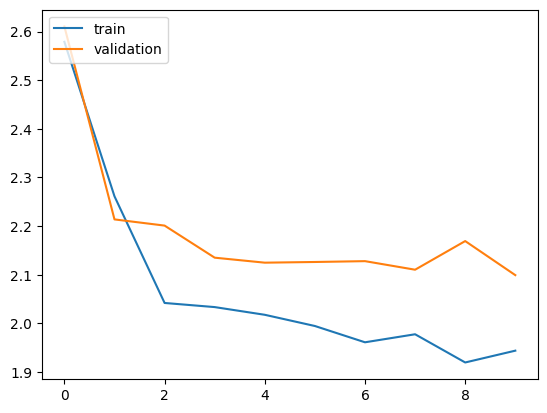

In [ ]:
pl1 = plt.plot(AE_trainer.train_losses, label = 'train')
pl2 = plt.plot(AE_trainer.val_losses, label = 'validation')
leg = plt.legend(loc='upper left')
plt.show()

# ConvAutoEncoder

In [ ]:
class AE_cls_train_val :
  def __init__ (self, model, n_epochs, criterion_AE, criterion_cls,
                optimizer,
                lr_scheduler = None) :

    self.model = model
    self.criterion_AE = criterion_AE
    self.criterion_cls = criterion_cls

    self.optimizer = optimizer
    self.n_epochs = n_epochs
    self.lr_sch = lr_scheduler
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    self.val_losses = []
    self.val_accs = []
    self.val_f1s = []
    self.train_losses = []
    self.train_accs = []
    self.train_f1s = []


    # self.val_losses_cls = []
    # self.val_losses_rec = []
    # self.train_losses_cls = []
    # self.train_losses_rec = []



  def train(self, AE_train_loader, AE_val_loader) :
    for epoch in range(self.n_epochs) :
      train_preds = []
      val_preds = []
      train_labels = []
      val_labels = []

      self.model.train()
      avg_train_loss, train_acc, train_f1 = self.train_epoch(AE_train_loader, train_preds, train_labels)
      self.model.eval()
      avg_val_loss, val_acc, val_f1 = self.val_epoch(AE_val_loader, val_preds, val_labels)

      print ('[epoch %d/%d] avg_train_loss: %.5f \t avg_val_loss: %.5f \t train_f1: %.15f \t val_f1: %.15f' % (epoch+1, self.n_epochs,
                                                                                                             avg_train_loss, avg_val_loss,
                                                                                                             train_f1, val_f1))



  def train_epoch (self, AE_train_loader, train_preds, train_labels, cl) :
    running_train_loss = 0.0
    train_correct = 0
    for batch, labels in AE_train_loader :
      batch = batch.float().to(self.device)

      self.optimizer.zero_grad()
      reconstructeds, probs = self.model(batch)

      loss_rec = self.criterion_AE (reconstructeds, batch)
      loss_cls = self.criterion_cls (probs, labels)
      loss = loss_rec + loss_cls
      loss.backward()
      self.optimizer.step()

      _, predicted = torch.max(classes, 1)
      train_correct += (predicted == labels).sum().item()
      running_train_loss += loss.item()
      train_preds.append(predicted)
      train_labels.append(labels)

    # train stats
    train_preds = np.concatenate(train_preds)
    train_labels = np.concatenate(train_labels)
    _, train_f1_score, _, _ = precision_recall_fscore_support(train_labels, train_preds, average= 'weighted')

    avg_train_loss = running_train_loss / len(AE_train_loader.dataset)
    train_acc = train_correct / len(AE_train_loader.dataset)

    self.train_losses.append (avg_train_loss)
    self.train_accs.append (train_acc)
    self.train_f1s.append (train_f1_score)

    return avg_train_loss, train_acc, train_f1_score

  def val_epoch (self, AE_val_loader, val_preds, val_labels) :
    running_val_loss = 0.0
    val_correct = 0
    with torch.no_grad() :
      for batch, labels in AE_val_loader :
        batch = batch.to(self.device).float()
        reconstructeds, classes = self.model(batch)
        loss_rec = self.criterion_AE (reconstructeds, batch)
        loss_cls = self.criterion_cls (classes, labels)
        loss = loss_rec + loss_cls

        _, predicted = torch.max(classes, 1)
        val_correct += (predicted == labels).sum().item()
        running_val_loss += loss.item()
        val_preds.append(predicted)
        val_labels.append(labels)

      # validation stats
      val_preds = np.concatenate(val_preds)
      val_labels = np.concatenate(val_labels)
      _, val_f1_score, _, _ = precision_recall_fscore_support(val_labels, val_preds, average= 'weighted')
    #   _, val_f1_mic, _, _ = precision_recall_fscore_support(val_labels, val_preds, average= 'micro')


      avg_val_loss = running_val_loss / len(AE_val_loader.dataset)
      val_acc = val_correct / len(AE_val_loader.dataset)

      self.val_losses.append (avg_val_loss)
      self.val_accs.append (val_acc)
      self.val_f1s.append (val_f1_score)

      return avg_val_loss, val_acc, val_f1_score




In [ ]:
ae_cls = ConvAutoencoder()
criterion_AE = nn.MSELoss()

class_weights = class_weight.compute_
criterion_cls = nn.NLLLoss()
optimizer = optim.Adam(ae_cls.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

AE_cls_trainer = AE_cls_train_val(ae_cls, 10, criterion_AE, criterion_cls, optimizer)
# print(torch.shape(train_loader))
AE_cls_trainer.train(train_loader, test_loader)

[epoch 1/10] avg_train_loss: 0.14301 	 avg_val_loss: 0.12272 	 train_f1: 0.965132496513250 	 val_f1: 1.000000000000000
[epoch 2/10] avg_train_loss: 0.11343 	 avg_val_loss: 0.09734 	 train_f1: 0.974895397489540 	 val_f1: 1.000000000000000
[epoch 3/10] avg_train_loss: 0.09503 	 avg_val_loss: 0.08291 	 train_f1: 0.986052998605300 	 val_f1: 1.000000000000000
[epoch 4/10] avg_train_loss: 0.08206 	 avg_val_loss: 0.07133 	 train_f1: 1.000000000000000 	 val_f1: 1.000000000000000
[epoch 5/10] avg_train_loss: 0.07334 	 avg_val_loss: 0.06437 	 train_f1: 1.000000000000000 	 val_f1: 1.000000000000000
[epoch 6/10] avg_train_loss: 0.06920 	 avg_val_loss: 0.06214 	 train_f1: 0.998605299860530 	 val_f1: 1.000000000000000
[epoch 7/10] avg_train_loss: 0.06530 	 avg_val_loss: 0.06025 	 train_f1: 0.998605299860530 	 val_f1: 1.000000000000000
[epoch 8/10] avg_train_loss: 0.06146 	 avg_val_loss: 0.05833 	 train_f1: 1.000000000000000 	 val_f1: 1.000000000000000
[epoch 9/10] avg_train_loss: 0.05990 	 avg_val_l

In [ ]:
final_loader = DataLoader(dataset, batch_size= batch_size, shuffle=True)
final_model = ConvAutoencoder()
final_trainer = AE_cls_train_val(final_model, 10, criterion_AE, criterion_cls, optimizer)
final_trainer.train(final_loader, final_loader)


[epoch 1/10] avg_train_loss: 0.17738 	 avg_val_loss: 0.17784 	 train_f1: 0.730723606168446 	 val_f1: 0.845788849347568
[epoch 2/10] avg_train_loss: 0.17760 	 avg_val_loss: 0.17703 	 train_f1: 0.708185053380783 	 val_f1: 0.880189798339265
[epoch 3/10] avg_train_loss: 0.17750 	 avg_val_loss: 0.17683 	 train_f1: 0.731909845788849 	 val_f1: 0.876631079478055
[epoch 4/10] avg_train_loss: 0.17762 	 avg_val_loss: 0.17726 	 train_f1: 0.750889679715303 	 val_f1: 0.874258600237248


KeyboardInterrupt: ignored

In [ ]:
final_model.classifier

Sequential(
  (0): Linear(in_features=128, out_features=2, bias=True)
  (1): Softmax(dim=1)
)

In [ ]:
class FinalClassifier (nn.Module) :
    def __init__(self, ae_model : ConvAutoencoder):
        super().__init__()

        self.enc = ae_model.enc
        self.classifier = ae_model.classifier

    def forward(self, x) :
        z = self.enc(x)
        out = self.classifier(z)
        return out

In [ ]:
final_classifier = FinalClassifier (final_model)
final_classifier

NameError: ignored

In [ ]:
path = '/content/drive/MyDrive/DataWizardS/content/iaaa-data/models/DataWizardS_Fourth_Model_AE_Classifier.pth'

torch.save(final_classifier.state_dict(), path)


# Tester

In [ ]:
class TestDICOMDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        # self.labels_df = labels_df
        # self.masks_dir = masks_dir
        self.transform = transform
        self.dicom_paths = os.listdir(self.dicom_dir)



    def __len__(self):
        return len(self.dicom_paths)

    def __getitem__(self, idx):

        # Load the DICOM image
        # subj_name = labels_df.iloc[idx]['SOPInstanceUID']

        # filename = subj_name + '.dcm'
        # dicom_path = os.path.join(self.dicom_dir, filename)

        dicom_path = dicom_path[idx]
        filename = dicom_path.split('/')[-1]
        ds = pydicom.dcmread(dicom_path)

        # Get the label
        # label = labels_df.iloc[idx]['Label']

        # Convert to PIL image
        img_np = np.float64(ds.pixel_array)

        # applying mask on image numpy array before converting that to torch tensor
        # if label == 0 :
        #     mask_name =  subj_name + '.png'
        #     mask_path = os.path.join(masks_dir, mask_name)
        #     mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY)
        #     img_np = mask*img_np  # same as using cv2.bitwise_and()

            # img_np = cv2.bitwise_and(img_np, img_np, mask = mask)

        img = Image.fromarray(img_np).convert('L')

        if self.transform:
            img = self.transform(img)

        return (filename, img), label



# labels_df['Label'].value_counts()

In [ ]:
class Tester :
    def __init__(self, model) :
        self.model = model

    def test (self, dataloader, output_path) :
        self.model.eval()
        all_names = np.asarray([], dtype=int)
        all_labels = np.asarray([], dtype=int)

        with torch.no_grad() :
            for name_im, _ in dataloader :

                names, batch = name_im

                output = self.model(batch)
                labels = torch.argmax(output, dim=1)

                names = np.asarray(names)
                labels = labels.numpy().astype('int')

                all_names = np.concatenate((all_names, names), axis=0)
                all_labels = np.concatenate((all_labels, labels), axis=0)


        df = pd.DataFrame({'name': all_names, 'labels': all_labels})
        df.to_csv(output_path, index=False)


In [ ]:
import torchvision
from torch.utils.data import DataLoader, SubsetRandomSampler


mod = ConvAutoencoder()
fin_mod = FinalClassifier(mod)

# tmpset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# tmploader = torch.utils.data.DataLoader(tmpset, batch_size=64,
#                                          shuffle=False, num_workers=2)
tmpset = DICDataset(dicom_dir, labels_df, masks_dir, transform)

percent = 0.1

# Calculate the number of samples to include based on the percentage
num_samples = int(percent * len(tmpset))

# Randomly sample the indices of the subset
indices = torch.randperm(len(tmpset), dtype=int)[:num_samples]

tmploader = torch.utils.data.DataLoader(tmpset, batch_size=16, shuffle=False,
                                        # sampler=SubsetRandomSampler(indices)
                                        )

In [ ]:
t = Tester(fin_mod)
t.test(tmploader, 'csv_path')

# CSV concatenation

In [ ]:
def csv_concat (path1, path2, output_path) :

    df1 = pd.read_csv(path1)

    df2 = pd.read_csv(path2)

    combined_df = pd.concat([df1, df2], ignore_index=True)

    combined_df.to_csv(output_path, index=False)